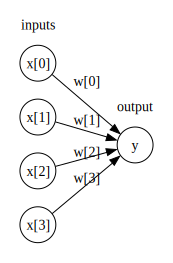

In [2]:
%matplotlib inline

import mglearn
import numpy as np
import matplotlib.pyplot as plt

# Multi layer perceptron : https://en.wikipedia.org/wiki/Perceptrons_(book)
# 

# On peut caractériser la régression linéaire par le suivant ci-après 
# Dans lequel on voit chaque caratéristique de la fonction de prédiction x[n] pondéré de son poids w[n]
display(mglearn.plots.plot_logistic_regression_graph())

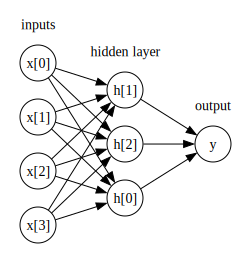

In [4]:
# Dans un perceptron, on introduit une couche ou plusieurs couche intermédiaire(s) entre les entrées et les sorties.
# Les poids sont calculés pour produire une variable que l'on pondère à la suite
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

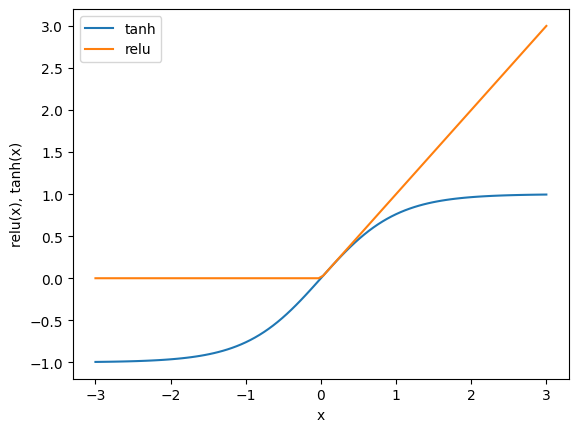

In [13]:
# Pour casser la multi-linéarité transverse inhérente au modèle : chaque couche est une application multi-linéaire
# On applique au résultat une fonction non-linéaire, par exemple la fonction REctifiedLinearUnit [ RElu ] ou tanh
# On appelle cette fonction " Fonction d'activation "

# On peut ainsi entraîner des modèles plus complexes

line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line,0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

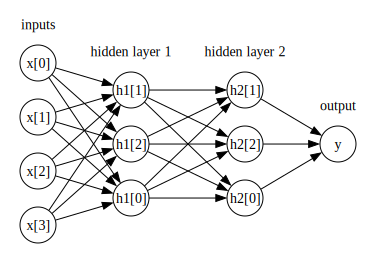

In [5]:
# On peut réprésenter le petit réseau de neurone précédent sous la forme des équations suivantes :
#
# h[0] = fa( w[0,0]*x[0] + w[1,0]*x[1] + w[2,0]*x[2] + w[3,0]*x[3] + b[0] )
# h[1] = fa( w[0,1]*x[0] + w[1,1]*x[1] + w[2,1]*x[2] + w[3,1]*x[3] + b[1] )
# h[2] = fa( w[0,2]*x[0] + w[1,2]*x[1] + w[2,2]*x[2] + w[3,2]*x[3] + b[2] )
# ^y^= h[0]*v[0] + h[1]*v[1] + h[2]*v[2] + b

# Pour un modèle à deux couches intermédiaires : 
display(mglearn.plots.plot_two_hidden_layer_graph())

Score : 0.880


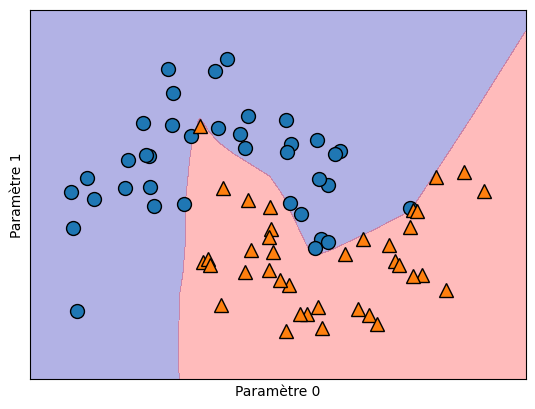

In [22]:
# Application du classificateur MLP au set 2 moons
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[100]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")

print("Score : {:.3f}".format(mlp.score(X_test,y_test)))

# Le modèle utilise 1 couche cachée de 100 noeuds, soit une décomposition de la frontière de décision en 100 
# lignes droites

Score : 0.880


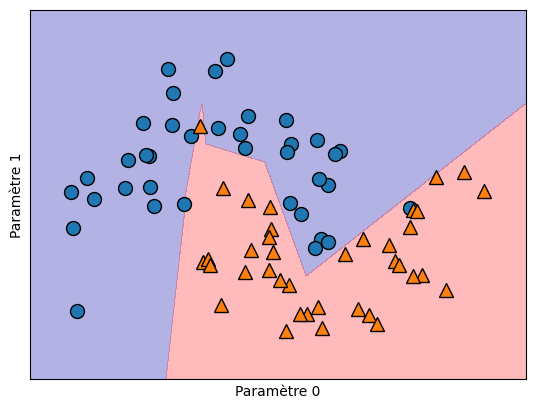

In [24]:
# Avec 1 couche cachée de 10 noeuds : 
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10],max_iter=500).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")

print("Score : {:.3f}".format(mlp.score(X_test,y_test)))

Text(0, 0.5, 'Paramètre 1')

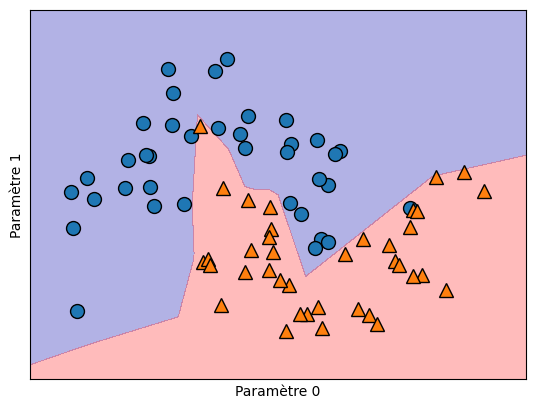

In [29]:
# 2 couches cachées de 10 noeuds chacune :
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10],max_iter=500).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")

Text(0, 0.5, 'Paramètre 1')

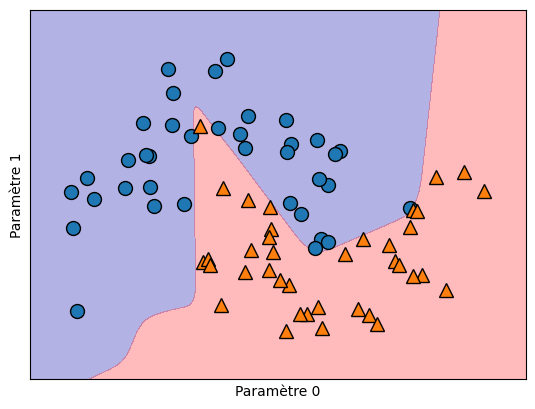

In [30]:
# 2 couches cachées de 10 noeuds chacune avec une fonction d'activation tanh
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10,10],
                    max_iter=500, activation='tanh').fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")